# Выявление закономерности успешности компьютерной игры

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры.

**Цель** выявление определяющих успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Из открытых источников доступны исторические данные о продажах игр до 2016 года (данные за 2016 год могут быть неполными).

**Исходные данные:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Для достижения цели решим следующие **задачи:**

1. Загрузим данные.
2. Подготовим данные для анализа.
3. Проведем исследовательский анализ данных.
4. Составим портрет пользователя каждого региона.
5. Проверим гипотезы.
6. Напишем общий вывод.

**СОДЕРЖАНИЕ**
1. [Загрузка данных](#1)
2. [Подготовка данных](#2)
3. [Исследовательский анализ данных](#3)
4. [Портрет пользователя каждого региона](#4)
5. [Проверка гипотез](#5)
6. [Общий вывод](#6)

### Загрузка данных
<a id="1"></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')

In [ ]:
display(games.head(10))
print('---------------------------------------ИНФОРМАЦИЯ----------------------------------------------------')
print(games.info())
print('----------------------------СРЕДНИЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ------------------------------------')
display(games.describe())
print('----------------------------------------ПРОПУСКИ-----------------------------------------------------')
print(games.isna().sum())
print('----------------------------------------ДУБЛИКАТЫ----------------------------------------------------')
print(games.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


---------------------------------------ИНФОРМАЦИЯ----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
----------------------------СРЕДНИЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ------------------------------------


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


----------------------------------------ПРОПУСКИ-----------------------------------------------------
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
----------------------------------------ДУБЛИКАТЫ----------------------------------------------------
0


**Явных дубликатов нет. Проверим на неявные дубликаты данные с типом objekt:**

In [ ]:
games[games['Name'].duplicated()].shape[0]

5155

Вполне возможно. Название игры одно, а вот обновления и версии могут выходить в разное время. Проверим дубликаты по имени, платформе и году релиза.

In [ ]:
games[games[['Name', 'Platform', 'Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Вот и нашлись пропуски в name и genre. С этими дубликатами разберемся позже

Дубликаты по игре Madden NFL 13 стоит предположить, что это одна и та же версия, отличия только в количестве проданных копий. Скорее всего здесь имеет место быть техническая ошибка, в результате которой отдельно учлись проданные копии в Европе в количестве 0,01. Считаем необходимым сложить количество проданных копий по Европе и удалить ненужную строку (сливаем две строки в одну).

In [ ]:
games.loc[604, 'EU_sales'] += games.loc[16230, 'EU_sales']
games.drop(index=16230, inplace=True)

In [ ]:
games[games['Name'] == 'Madden NFL 13']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


Посмотрим на уникальные наименования в столбцах Platform, Genre, Rating

In [ ]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Промежуточный вывод 1:**

Данные состоят из 16715 строк и 11 столбцов:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Наименования столбцов необходимо привести в соответствии с хорошим стилем к нижнему регистру. Типы данных в столбцах: 'Year_of_Release' стоит изменить на целочисленный int, 'Critic_Score' стоит изменить на числовой float. Явных дубликатов в данных нет, обнаружены и обработаны неявные дубликаты по имени, платформе и году релиза. В данных присутствует большое количество пропусков:
- Name 2 - 0,01%
- Genre 2 - 0,01%
- Year_of_Release 269 - 1,61%
- User_Score 6701 - 40,09%
- Rating 6766 - 40,48%
- Critic_Score 8578 - 51,32%

### Подготовка данных
<a id="2"></a>

#### Заменим названия столбцов

Приведем наименования столбцов в соответствии с хорошим стилем к нижнему регистру

In [ ]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Преобразуем типы столбцов в нужные типы

Проверим значения в столбцах 'year_of_release','critic_score', 'user_score'

In [ ]:
games['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

**Все значения целочисленные, изменим тип данных:**

In [ ]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [ ]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

**Тип данных object скорее всего из-за значения 'tbd'.** 'tbd' - это сокращение от "to be determined" (англ. "будет определено позже"). В данных о видеоиграх это обычно означает, что:
- рейтинг игрока (user_score) ещё не определён (например, игра новая, и оценок пока мало).
- официальный рейтинг (critic_score) не опубликован (ожидается обновление данных).
- значение временно отсутствует и будет добавлено позже.

**Заменим это значение на Nan, если в прошлом не смогли определиться с оценкой, мы уже этого не сможем сделать. Изменим тип данных на float**

In [ ]:
games['user_score'] = pd.to_numeric(games['user_score'].replace('tbd', np.nan), errors='coerce')
games['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


#### Обработка пропусков

Посмотрим на процент пропусков от общего размера датасета.

In [ ]:
round(games.isna().mean().sort_values()*100,2)

platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
name                0.01
genre               0.01
year_of_release     1.61
rating             40.48
critic_score       51.32
user_score         54.59
dtype: float64

In [ ]:
tmp = games.copy()            # Делаем копию текущего датасета
missing_stats = pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(),'Доля пропусков': tmp.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет"

,Кол-во пропусков,Доля пропусков
name,2,0.000100
year_of_release,269,0.016100
genre,2,0.000100
critic_score,8578,0.513200
user_score,9125,0.545900
rating,6766,0.404800


**name и genre**

Суда по размеру пропусков в name и genre, они должны совпасть. Проверим это:

In [ ]:
games.query('name.isna() & genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Данные не восстановить, удалим их.**

In [ ]:
games = games.dropna(subset = ['name'])

**year_of_release**

In [ ]:
games.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Можно заполнить данные по году, указанному в наименовании (двухзначному ""16 или четырехзначному). Однако, не все так просто. В большинстве случаев цифра-год в названии игры отражает не календарный год выхода, а тот год, к которому игра приурочена по смыслу. Но нюансы зависят от жанра и маркетинговой традиции конкретной серии:
- Спортивные ежегодные серии (FIFA 23, NBA 2K24, F1 23, NHL 24)	Год в названии — следующий спортивный сезон, то есть игра «FIFA 23» выходит осенью 2022 года, но посвящена сезону 2022/23 и официально несёт номер «23».
- Симуляторы менеджмента / менеджерские издания (Football Manager 2024, Motorsport Manager 2023 Update)	То же правило: номер отражает сезон, который игрок будет «вести», а релиз обычно случается за несколько месяцев до начала этого сезона.
- Гонки с лицензиями чемпионатов (F1 23, WRC 23)	Номер = сезон чемпионата. Выход — в середине или конце фактического года.
- Игры, где год описывает сеттинг (Battlefield 2042, Cyberpunk 2077, 1979 Revolution)	Год указывает на внутриигровое время действий. Он не связан напрямую с датой релиза. Battlefield 2042 вышла в 2021 году, но события по лору происходят в 2042-м.
- Редкие случаи «юбилейных переизданий» (Doom 3: BFG Edition 2012, Myst 25th Anniversary 2018)	Цифра может маркировать юбилей или версию («25th Anniversary»). Тут год не всегда в самом названии, но может фигурировать на обложке.

Посмотрим на игры, в наименовании которых есть года (двухзначные "хвосты" и четырехзначные) при пропущенном значении в year_of_release

In [ ]:
df = games.query('year_of_release.isna()')

In [ ]:
years = ['80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
         '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
         '00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
         '10', '11', '12', '13', '14', '15', '16'
         '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
         '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
         '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
         '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [ ]:
# Создаем regex pattern для поиска конкретных чисел
pattern = r'\b(' + '|'.join(map(str, years)) + r')\b'

# Поиск строк, содержащих числа из списка
df['fone'] = df['name'].str.contains(pattern, na=False)

/opt/conda/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/tmp/ipykernel_484/2058960568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fone'] = df['name'].str.contains(pattern, na=False)


In [ ]:
df.query('fone == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,fone
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,True
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,True
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,True
1301,Triple Play 99,PS,<NA>,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN,True
1650,NASCAR Thunder 2003,PS2,<NA>,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,True
2479,Madden NFL 07,PSP,<NA>,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E,True
2492,MLB SlugFest 20-03,PS2,<NA>,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E,True
2572,PES 2009: Pro Evolution Soccer,PSP,<NA>,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,True
2849,Madden NFL 11,Wii,<NA>,Sports,0.68,0.00,0.00,0.04,75.0,5.4,E,True
3413,Madden NFL 06,X360,<NA>,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E,True


**Заполним year_of_release только при наличии года (двухзначного или четырехзначного) по жанру Sports и Fighting**

In [ ]:
def fill_missing_years(data, years):
    # Создаем копию, чтобы избежать SettingWithCopyWarning
    data = data.copy()

    # Маска для нужных строк: пропущенный год + нужные жанры
    mask = (data['year_of_release'].isna() &
            data['genre'].isin(['Sports', 'Fighting']))

    year_pattern = re.compile(
        r'\b(?:19[89]\d|20[01]\d|8[0-9]|9[0-9]|0[0-9]|1[0-6])\b'
    )

    for idx, row in data[mask].iterrows():
        game_name = str(row['name'])

        # Ищем все совпадения с шаблоном года
        matches = year_pattern.findall(game_name)

        for match in matches:
            # Преобразуем найденное значение в год
            if len(match) == 2:
                # Для двухзначных годов (80-99 → 1980-1999, 00-16 → 2000-2016)
                year = int(match)
                year_candidate = 1900 + year if year >= 80 else 2000 + year
            else:
                year_candidate = int(match)

            # Проверяем допустимость года
            if 1980 <= year_candidate <= 2016:
                data.at[idx, 'year_of_release'] = year_candidate - 1
                break  # Используем первое подходящее совпадение

    return data

In [ ]:
games = fill_missing_years(games, years)

**Проверим работу функции:**

In [ ]:
games.query('name in ["Triple Play 99", "MLB SlugFest 20-03", "All-Star Baseball 2005"]')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,Triple Play 99,PS,1998,Sports,0.81,0.55,0.0,0.10,NaN,NaN,NaN
2492,MLB SlugFest 20-03,PS2,2002,Sports,0.41,0.32,0.0,0.11,77.0,8.2,E
5655,All-Star Baseball 2005,PS2,2004,Sports,0.16,0.12,0.0,0.04,72.0,8.6,E
7541,MLB SlugFest 20-03,XB,2002,Sports,0.15,0.04,0.0,0.01,79.0,7.8,E
8918,All-Star Baseball 2005,XB,2004,Sports,0.11,0.03,0.0,0.01,75.0,8.8,E
8983,MLB SlugFest 20-03,GC,2002,Sports,0.11,0.03,0.0,0.00,80.0,7.5,E


**Остальные строки без года выпуска, которые не удалось заполнить, удалим**

In [ ]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

**critic_score**

In [ ]:
print('Доля пропущенных значений от общего числа записей: ',
      '{:.2%}'.format(games['critic_score'].isna().sum() / games.shape[0]))
games.query('critic_score.isna()')

Доля пропущенных значений от общего числа записей:  51.43%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16457,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16459,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16460,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Доля пропущенных значений в critic_score велика. Заполнить их средним значением индивидуальную оценку критиков мы не можем. Поэтому пропущенные данные не стоит удалять.**

**user_score**

In [ ]:
print('Доля пропущенных значений от общего числа записей: ',
      '{:.2%}'.format(games['user_score'].isna().sum() / games.shape[0]))
games.query('user_score.isna()')

Доля пропущенных значений от общего числа записей:  54.60%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16457,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16459,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16460,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Здесь также очень большая доля пропущенных значений. Из-за индивидуальности оценки пользователей, мы не можем заполнить данные средними значениями. Данные не удаляем.**

**rating**

In [ ]:
print('Доля пропущенных значений от общего числа записей: ',
      '{:.2%}'.format(games['rating'].isna().sum() / games.shape[0]))
games.query('rating.isna()')

Доля пропущенных значений от общего числа записей:  40.58%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16457,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16459,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16460,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Пропуски в столбце rating встречаются вместе с пропусками в столбцах critic_score, user_score. Пропуски есть независимо от платформы, года выпуска, жанра. Удалить строки с пропусками мы не можем, так как они составляют почти половину датасета. В данном случае следует поставить "заглушку".**

In [ ]:
games['rating'] = games['rating'].fillna('Unknown')
games.rating.value_counts()

Unknown    6681
E          3933
T          2905
M          1536
E10+       1394
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

**Посмотрим на данные после обработки пропусков.**

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16462 entries, 0 to 16461
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  Int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7474 non-null   float64
 10  rating           16462 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [ ]:
round(games.isna().mean().sort_values()*100,2)

name                0.00
platform            0.00
year_of_release     0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
rating              0.00
critic_score       51.43
user_score         54.60
dtype: float64

#### Добавим столбец с суммарными продажами во всех регионах

In [ ]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


**Промежуточный вывод 2:**

В результате подготовки данных:
- наименования столбцов были приведены в соответствии с хорошим стилем к нижнему регистру
- преобразованы типы данных в соответствии с содержимым в столбцах year_of_release - Int64, user_score - float64
- удалены пропуски в столбцах name, genre и частично в year_of_release
- частично восстановлены данные в столбце year_of_release за счет указанного года в наименовании игры
- не удалены пропуски в столбцах critic_score, user_score и rating
- в столбце rating пропущенные значения заменены на 'Unknown'
- добавлен столбец total_sales с суммарными продажами во всех регионах.

Количество строк сократилось до 16462. Пропуски остались в столбцах critic_score (51,42%), user_score (54,60%) и rating (заполнены значением 'Unknown').

In [ ]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16462 entries, 0 to 16461
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  Int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7474 non-null   float64
 10  rating           16462 non-null  object 
 11  total_sales      16462 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

### Исследовательский анализ данных
<a id="3"></a>

#### Сколько игр выпускалось в разные годы

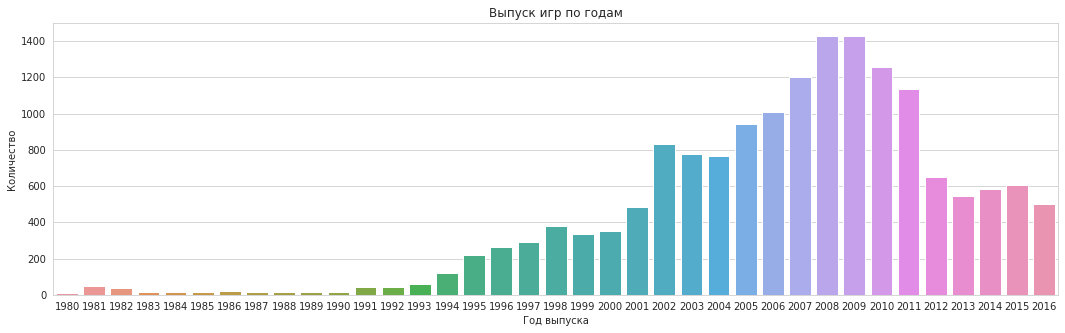

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.countplot(data = games, x='year_of_release')
plt.title(f'Выпуск игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.show()

С 1980 до 1990 - ценность данных в основном историческая: они показывают зарождение рынка и могут пригодиться для долгосрочной ретроспективы.

С 1990 по 1996 - начинается массовое производство для PC и консолей 4-го поколения.

С 1997 по 2004 - переход на CD/DVD, появление PlayStation 2, Xbox, Steam — индустрия становится мейнстримом.

С 2005 по 2009 (пик) - HD-консоли (PS3/X360), дешёвая цифровая дистрибуция; широкий спектр жанров.

С 2010 по 2016 - рынок насыщается, AAA-бюджеты растут, мобильные и F2P-проекты уходят в другие витрины, которые здесь скорее всего отражены. Кроме того становится важным качество и реалистичность. На реализацию таких проектов уходит значительное количество средств и сил.

Также стоит не забывать, что по условиям проекта данные за 2016 год могут быть неполными.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

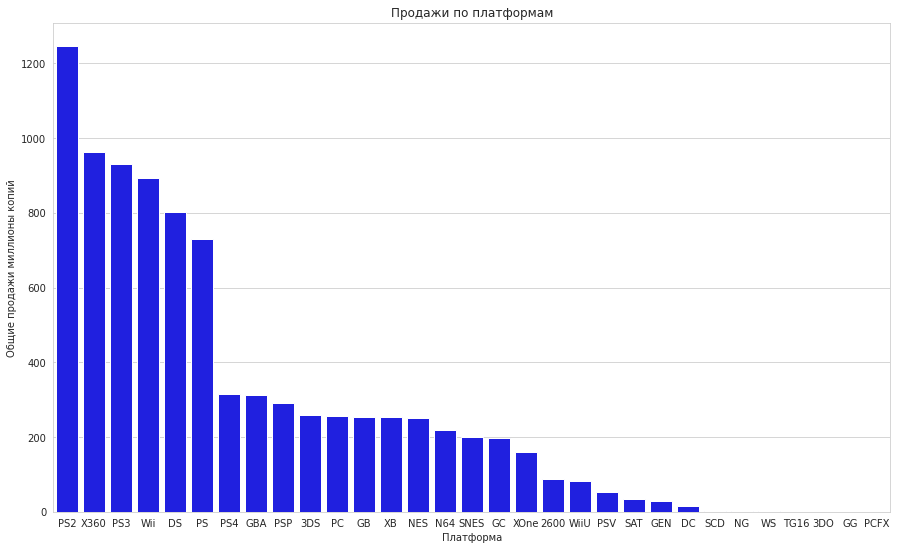

In [ ]:
platform_sales = (games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(15, 9))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'total_sales', color = 'blue')
    .set(title = 'Продажи по платформам', xlabel = 'Платформа', ylabel = 'Общие продажи миллионы копий'))
plt.show()

**Больше всего выделяются 6 платформ. Однако, для дальнейшего рассмотрения возьмем 14 платформ (с запасом) с наибольшим количеством продаж.**

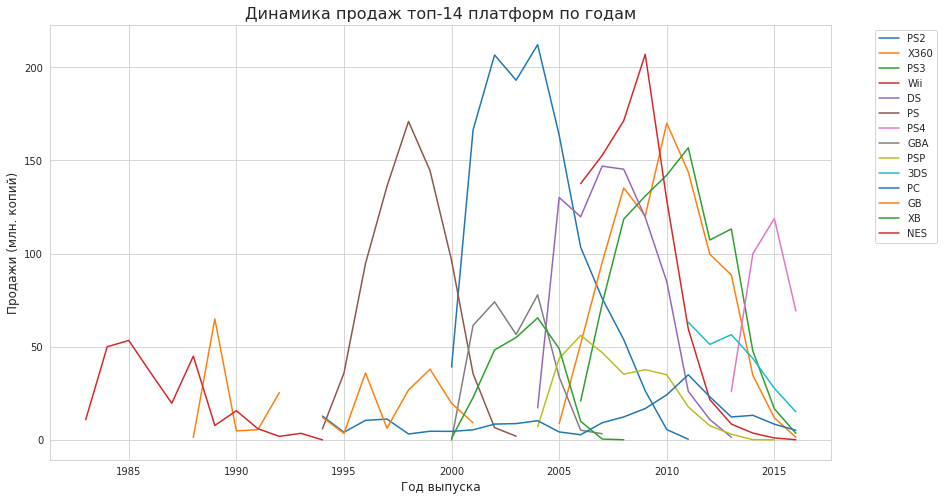

In [ ]:
platform_sales_by_year = games.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

top_platforms = games.groupby('platform')['total_sales'].sum().nlargest(14).index
platform_sales_filtered = platform_sales_by_year[top_platforms]

plt.figure(figsize=(14, 8))

for platform in platform_sales_filtered.columns:
    plt.plot(platform_sales_filtered.index,
             platform_sales_filtered[platform],
             label=platform)

plt.title('Динамика продаж топ-14 платформ по годам', fontsize=16)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Продажи (млн. копий)', fontsize=12)
#plt.xticks(np.arange(1980, 2018, 2), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.grid(True, linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()

**Большинство платформ имеют жизненный цикл примерно в 10 лет. Пик продаж на большинстве платформ достигается примерно к середине "жизни" платформы. Игры, выходившие на компьютерах (PC) - всегда имеют низкий уровень продаж относительно других платформ, но довольно длинную "жизнь".**

In [ ]:
# Комментарий ревьюера
temp = games.copy()
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона,
                                                            # поэтому +1
time_life['life'].median()

7.0

#### Возьмем данные за соответствующий актуальный период.

**Поскольку:**
- средний жизненный цикл одной платформы - 10 лет,
- пик развития платформы приходится на середину "жизни",
- учитывая выпуск игр по годам, а именно небольшое повышение количества выпущенных игр начиная с 2013 года включительно (2016 год снижение, но по условиям проекта - данные за 2016 год могут быть не полными).

необходимо определить актуальный период для прогнозирования на 2017 год - с 2013 года вкличительно. По этому промежутку будет видно, какие платформы уже точно потеряли свою значимость, какие только находятся в стадии роста, а какие - в пике своего роста.

In [ ]:
actual_period = games[games['year_of_release'] >= 2013]

#### Какие платформы лидируют по продажам, растут или падают

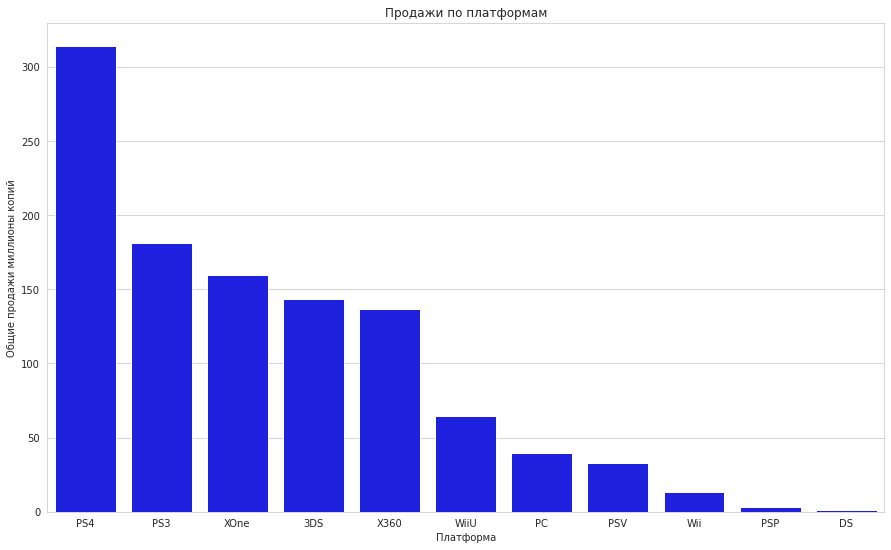

In [ ]:
platform_actual_period = (actual_period.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(15, 9))
(sns.barplot(data = platform_actual_period, x = platform_actual_period.index, y = 'total_sales', color = 'blue')
    .set(title = 'Продажи по платформам', xlabel = 'Платформа', ylabel = 'Общие продажи миллионы копий'))
plt.show()

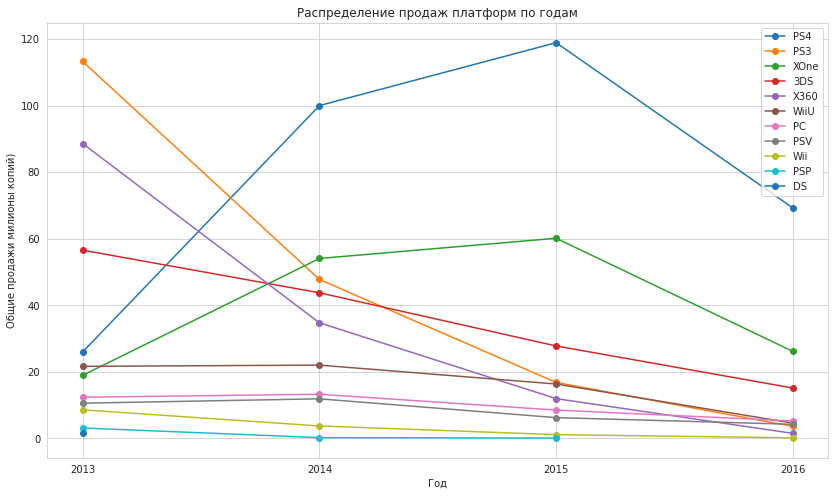

In [ ]:
actual_platform_sales_by_year = actual_period.query(
    'platform in @platform_actual_period.index').pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

# Визуализируем распределение
plt.figure(figsize=(14, 8))
for platform in platform_actual_period.index:
    plt.plot(actual_platform_sales_by_year[platform], label=platform, marker='o')

plt.title('Распределение продаж платформ по годам')
plt.xlabel('Год')
plt.ylabel('Общие продажи милионы копий)')
plt.xticks(np.arange(2013, 2017, 1))
plt.legend()
plt.grid(True)
plt.show()

**PS4, PS3, XOne, 3DS, X360 являются лидерами продаж за актуальный период.**

**DS, PSP, Wii, PSV - либо совсем "умерли", как платформы, либо продажи стремительно близятся к 0.**

#### Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам.

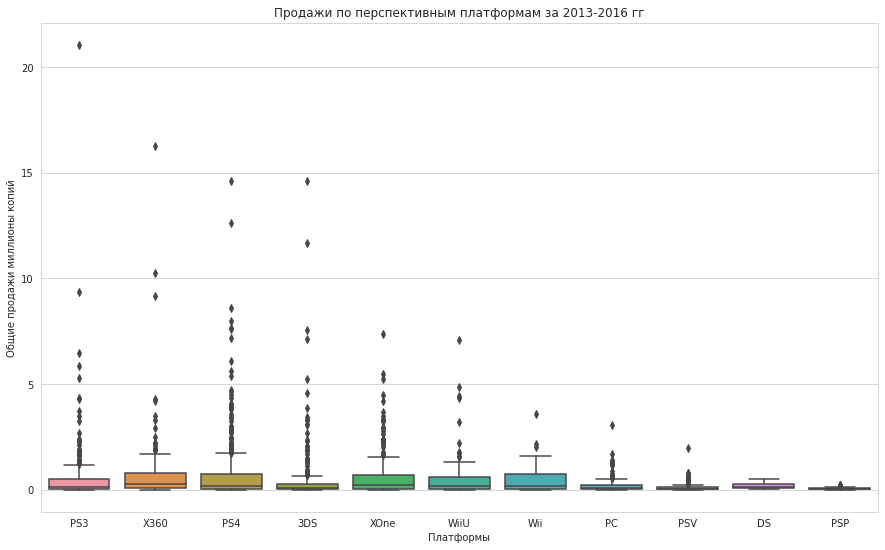

In [ ]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = actual_period, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2013-2016 гг',
         xlabel = 'Платформы',
         ylabel = 'Общие продажи миллионы копий'))
plt.show()

**Немного изменим масштаб, чтобы разобраться в размерах.**

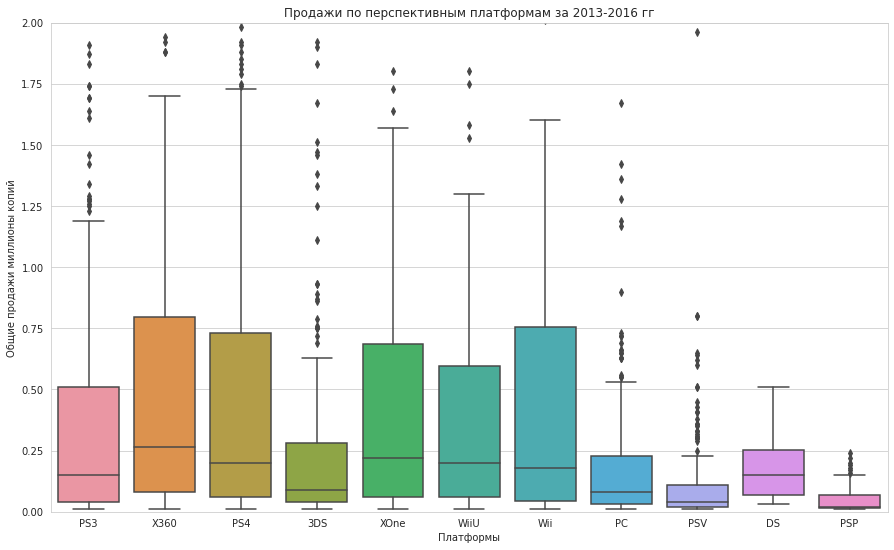

In [ ]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = actual_period, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2013-2016 гг',
         xlabel = 'Платформы',
         ylabel = 'Общие продажи миллионы копий',
         ylim=(0, 2)))
plt.show()

**Медианные продажи для большинства платформ весьма скромны и составляют менее 0,5 млн копий. Это говорит о том, что большинство игр продаются в небольших объемах, в то время как лишь немногие становятся бестселлерами.
Платформы, такие как X360, Wii, PS4, XOne и WiiU имеют более высокие медианные продажи по сравнению с другими. Это говорит о большей популярности их игр в среднем.
У большинства платформ есть выбросы, что, вероятно, указывает на наличие игр-бестселлеров, которые продаются гораздо лучше, чем большинство других игр на платформе.**

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

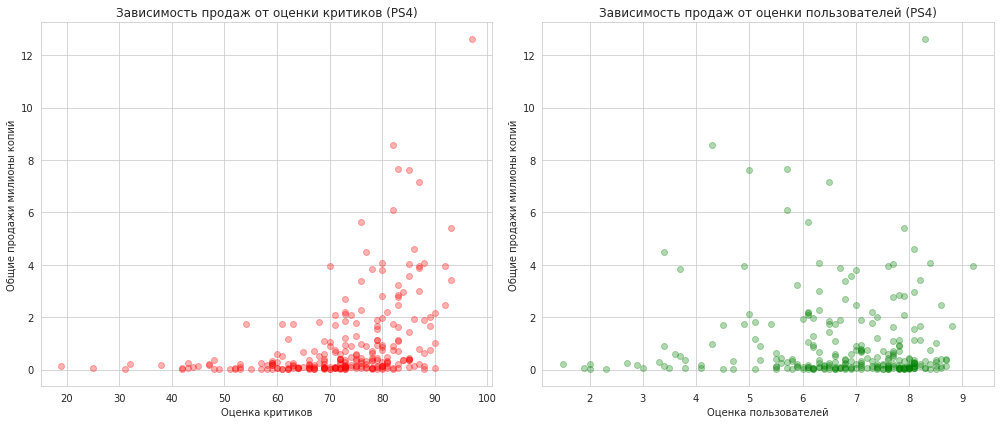

Коэффициент корреляции Пирсона: оценки критиков и продажи -> 0.406567902061781
Коэффициент корреляции Пирсона: оценки пользователей и продажи -> -0.031957110204556376


In [ ]:
ps4_data = actual_period[actual_period['platform'] == 'PS4'].copy()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.3, color='red')
ax[0].set_title('Зависимость продаж от оценки критиков (PS4)')
ax[0].set_xlabel('Оценка критиков')
ax[0].set_ylabel('Общие продажи милионы копий')
ax[0].grid(True)

# Визуализация для корреляции оценок пользователей и продаж
ax[1].scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.3, color='green')
ax[1].set_title('Зависимость продаж от оценки пользователей (PS4)')
ax[1].set_xlabel('Оценка пользователей')
ax[1].set_ylabel('Общие продажи милионы копий')
ax[1].grid(True)

plt.tight_layout()
plt.show()

critic_corr = ps4_data['total_sales'].corr(ps4_data['critic_score'])
user_corr = ps4_data['total_sales'].corr(ps4_data['user_score'])

print(f'Коэффициент корреляции Пирсона: оценки критиков и продажи -> {critic_corr}')
print(f'Коэффициент корреляции Пирсона: оценки пользователей и продажи -> {user_corr}')

**Как видно из графиков, корреляция между оценками пользователей и продажами нет на платформе PS4.
А вот между оценками критиков и продажами есть небольшая корреляция. Т.е чем выше оценка критиков, тем выше продажи.**

#### Соотнесем выводы с продажами игр на других платформах.

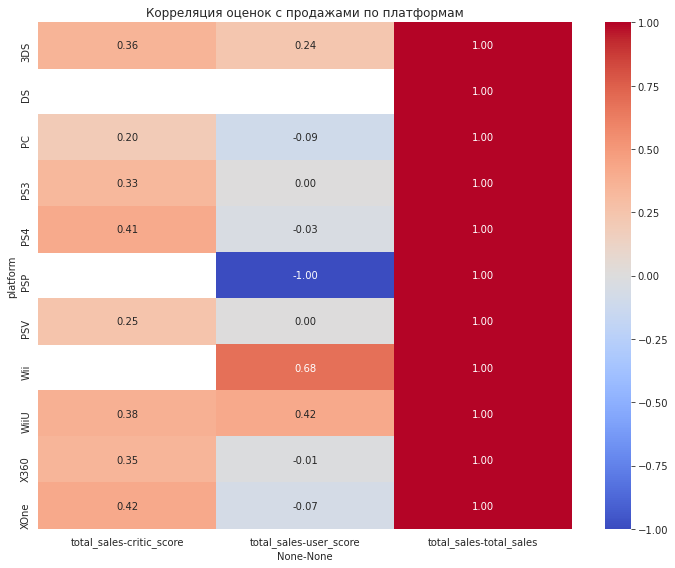

In [ ]:
corr_matrix = actual_period.groupby('platform')[['critic_score', 'user_score', 'total_sales']].corr().unstack()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[:, ['total_sales']],
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Корреляция оценок с продажами по платформам')
plt.tight_layout()
plt.show()

In [ ]:
def plot_scores_vs_sales_top_platforms(data, top_n=5, score_cols=('critic_score', 'user_score'),
                                       sales_col='total_sales'):
    """
    Строит скаттер-диаграммы «оценка → продажи» и выводит коэффициенты корреляции
    для `top_n` крупнейших по суммарным продажам платформ.

    Parameters
    ----------
    data : pd.DataFrame
        Таблица, где есть столбцы 'platform', оценки критиков/пользователей и продажи.
    top_n : int, optional (default=5)
        Сколько самых продаваемых платформ анализировать.
    score_cols : tuple(str, str)
        Имена столбцов с оценками (critic_score, user_score). Порядок важен: сначала критики.
    sales_col : str
        Название столбца с глобальными продажами.
    """

    # 1. Определяем top-N платформ
    top_platforms = (
        data.groupby('platform')[sales_col]
            .sum()
            .sort_values(ascending=False)
            .head(top_n)
            .index
    )

    # 2. Создаём фигуру: по две оси на каждую платформу
    n_rows = top_n
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows), sharey=False)
    if n_rows == 1:
        axes = axes.reshape(1, 2)  # гарантируем двумерность

    # 3. Цикл по платформам
    for i, plat in enumerate(top_platforms):
        subset = data[data['platform'] == plat]

        # --- график "critic_score vs sales" ---
        ax_c = axes[i, 0]
        ax_c.scatter(subset[score_cols[0]], subset[sales_col], alpha=0.3, color='red')
        ax_c.set_title(f'{plat}: продажи vs {score_cols[0]}')
        ax_c.set_xlabel('Оценка критиков')
        ax_c.set_ylabel('Продажи, млн копий')
        ax_c.grid(True)

        # --- график "user_score vs sales" ---
        ax_u = axes[i, 1]
        ax_u.scatter(subset[score_cols[1]], subset[sales_col], alpha=0.3, color='green')
        ax_u.set_title(f'{plat}: продажи vs {score_cols[1]}')
        ax_u.set_xlabel('Оценка пользователей')
        ax_u.set_ylabel('Продажи, млн копий')
        ax_u.grid(True)

        # --- корреляции ---
        critic_corr = subset[sales_col].corr(subset[score_cols[0]])
        user_corr   = subset[sales_col].corr(subset[score_cols[1]])

        print(f'{plat}:  corr(critic, sales) = {critic_corr:.3f} | '
              f'corr(user, sales) = {user_corr:.3f}')

    plt.tight_layout()
    plt.show()

PS4:  corr(critic, sales) = 0.407 | corr(user, sales) = -0.032
PS3:  corr(critic, sales) = 0.334 | corr(user, sales) = 0.002
XOne:  corr(critic, sales) = 0.417 | corr(user, sales) = -0.069
3DS:  corr(critic, sales) = 0.357 | corr(user, sales) = 0.242
X360:  corr(critic, sales) = 0.350 | corr(user, sales) = -0.012


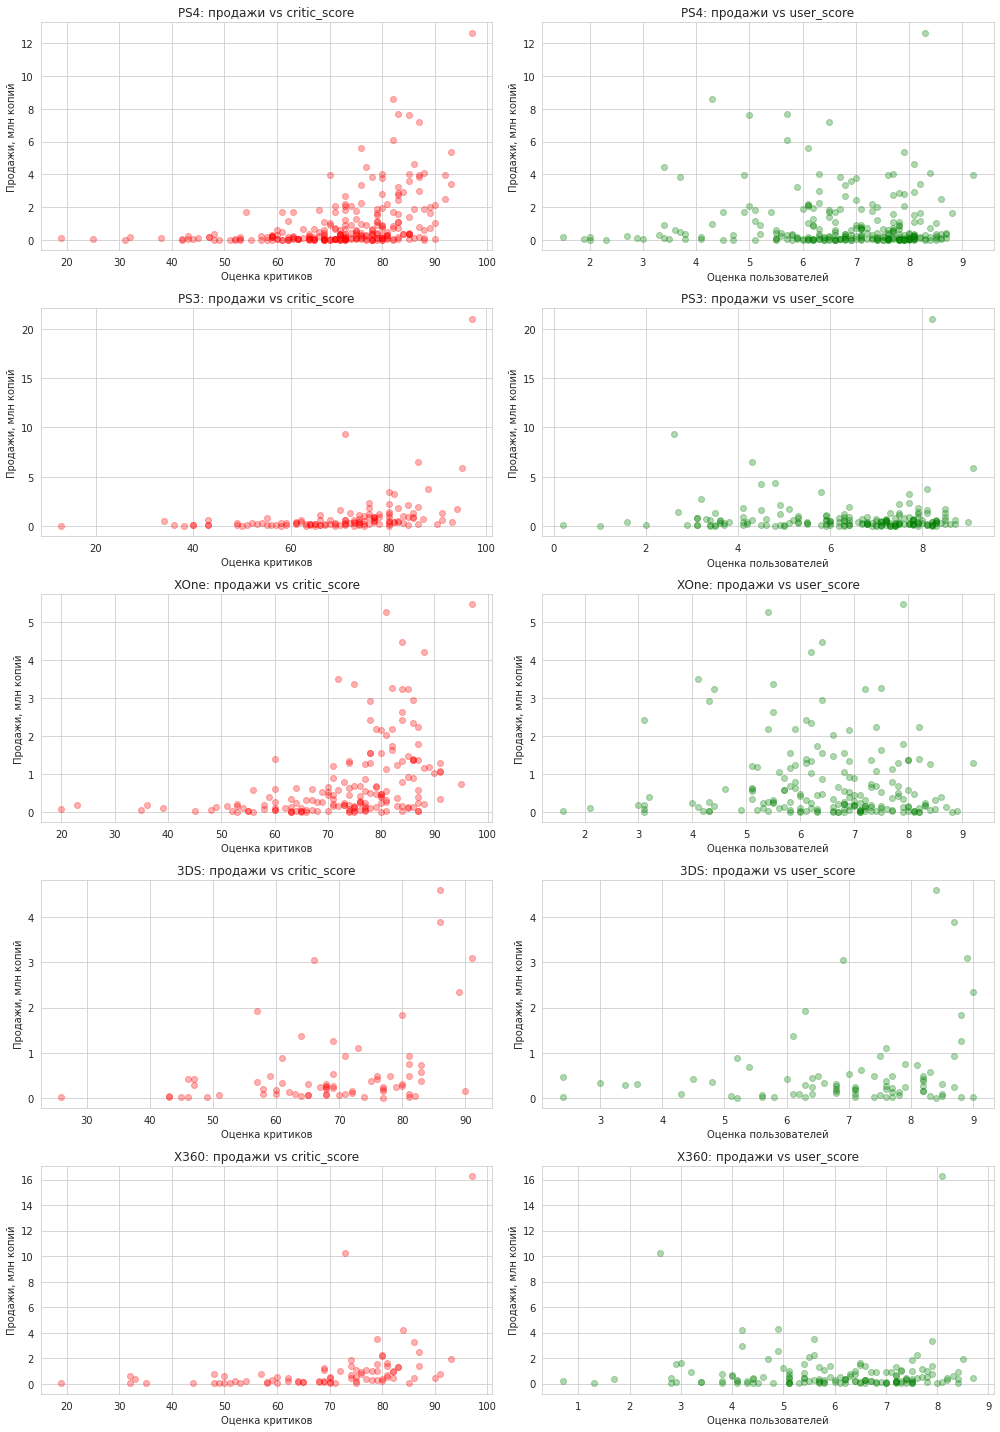

In [ ]:
plot_scores_vs_sales_top_platforms(actual_period, top_n=5, score_cols=('critic_score', 'user_score'),
                                       sales_col='total_sales')

В целом корреляция слабая и местами отсутствует совсем.
- самая сильная корреляция отзывов пользователей и продаж у платформы 3DS. У других платформ "пользовательская" корреляция очень слабая.
- самая сильная корреляция отзывов критиков и продаж у платформы XOne, PS4 и 3DS.
- в целом корреляция отзывов критиков сильнее, чем корреляция отзывов пользователей. В целом, такие зависимости могут объясняться тем, что оценки критиков обычно доступны до релиза игры и могут повлиять на решение о покупке, в то время как оценки пользователей часто основываются на реальном опыте игры и могут быть более разнообразными и субъективными.

#### Посмотрим на общее распределение игр по жанрам.

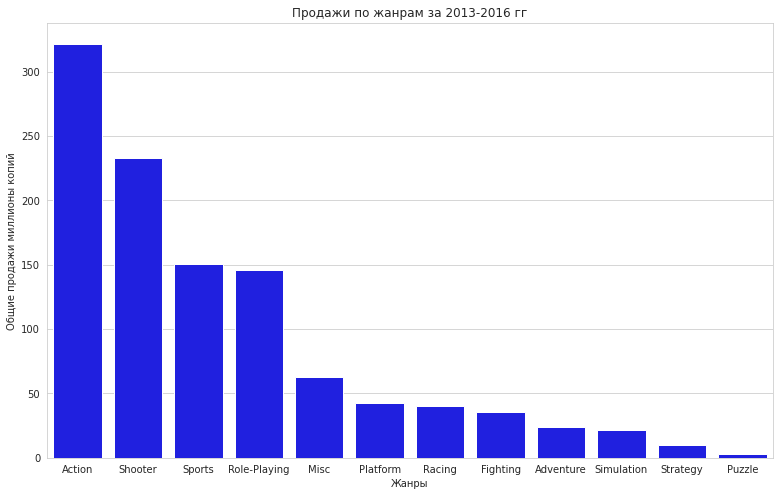

In [ ]:
platform_sales_genre = (
    actual_period.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)

plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_genre, x = platform_sales_genre.index, y = 'total_sales', color = 'blue')
    .set(title = 'Продажи по жанрам за 2013-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи миллионы копий'))

plt.show()

**По продажам лидирует жанр Action, Shoter, Sports и Role-Playing. Action значительно выделяются по продажам, достигая более 300 миллионов копий. Меньше всего зарабатывают игры жанра puzzle и strategy.**

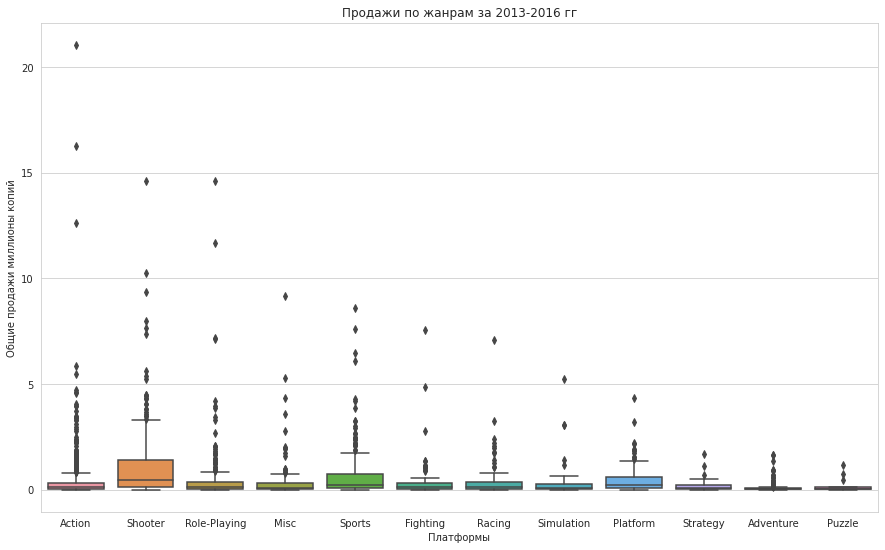

In [ ]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = actual_period, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам за 2013-2016 гг',
         xlabel = 'Платформы',
         ylabel = 'Общие продажи миллионы копий'))

plt.show()

**Немного изменим масштаб, чтобы разобраться в размерах.**

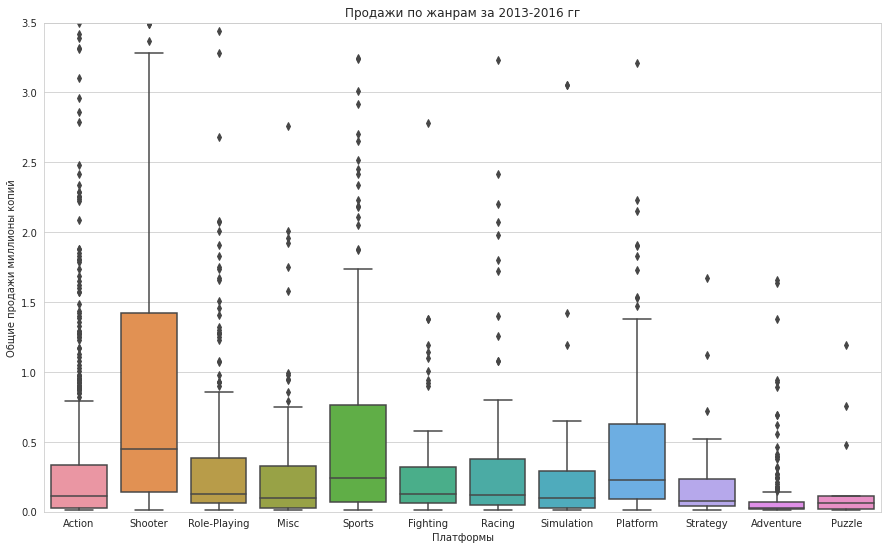

In [ ]:
#новый код 1
plt.figure(figsize=(15, 9))
(sns.boxplot(data = actual_period, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам за 2013-2016 гг',
         xlabel = 'Платформы',
         ylabel = 'Общие продажи миллионы копий',
         ylim=(0, 3.5)))

plt.show()

На данном графике видно, что хорошо продаются шутеры, медиана продаж данного жанра превосходит остальные жанры. Данный жанр можно считать привлекательным для продаж. Большинство жанров усредненные и имеют схожие медианы. Из них выделить платформеры и спортивные игры, они тоже имеют неплохие показатели.

**Промежуточный вывод 3:**

С 1980 до 1990 - ценность данных в основном историческая: они показывают зарождение рынка и могут пригодиться для долгосрочной ретроспективы.

С 1990 по 1996 - начинается массовое производство для PC и консолей 4-го поколения.

С 1997 по 2004 - переход на CD/DVD, появление PlayStation 2, Xbox, Steam — индустрия становится мейнстримом.

С 2005 по 2009 (пик) - HD-консоли (PS3/X360), дешёвая цифровая дистрибуция; широкий спектр жанров.

С 2010 по 2016 - рынок насыщается, AAA-бюджеты растут, мобильные и F2P-проекты уходят в другие витрины, которые здесь скорее всего отражены. Кроме того становится важным качество и реалистичность. На реализацию таких проектов уходит значительное количество средств и сил.

Поскольку:
- средний жизненный цикл одной платформы - 10 лет,
- пик развития платформы приходится на середину "жизни",
- учитывая выпуск игр по годам, а именно небольшое повышение количества выпущенных игр начиная с 2013 года включительно (2016 год снижение, но по условиям проекта - данные за 2016 год могут быть не полными).

актуальный период для прогнозирования на 2017 год определен - с 2013 года включительно.

PS4, PS3, XOne, 3DS, X360 являются лидерами продаж за актуальный период.

Медианные продажи для большинства платформ весьма скромны и составляют менее 0,5 млн копий. Это говорит о том, что большинство игр продаются в небольших объемах, в то время как лишь немногие становятся бестселлерами.
Платформы, такие как X360, Wii, PS4, XOne и WiiU имеют более высокие медианные продажи по сравнению с другими. Это говорит о большей популярности их игр в среднем.
У большинства платформ есть выбросы, что, вероятно, указывает на наличие игр-бестселлеров, которые продаются гораздо лучше, чем большинство других игр на платформе.

В целом корреляция слабая и местами отсутствует совсем.
- самая сильная корреляция отзывов пользователей и продаж у платформы 3DS. У других платформ "пользовательская" корреляция очень слабая.
- самая сильная корреляция отзывов критиков и продаж у платформы XOne, PS4 и 3DS.
- в целом корреляция отзывов критиков сильнее, чем корреляция отзывов пользователей. В целом, такие зависимости могут объясняться тем, что оценки критиков обычно доступны до релиза игры и могут повлиять на решение о покупке, в то время как оценки пользователей часто основываются на реальном опыте игры и могут быть более разнообразными и субъективными.

По продажам лидирует жанр Action, Shoter, Sports и Role-Playing. Action значительно выделяются по продажам, достигая более 300 миллионов копий. Меньше всего зарабатывают игры жанра puzzle и strategy.

Однако если учитывать медиану продаж Shoter превосходит остальные жанры. Данный жанр можно считать привлекательным для продаж. Большинство жанров усредненные и имеют схожие медианы. Из них можно выделить платформеры и спортивные игры, они тоже имеют неплохие показатели.

### Портрет пользователя каждого региона
<a id="4"></a>

#### Самые популярные платформы (тор-5)

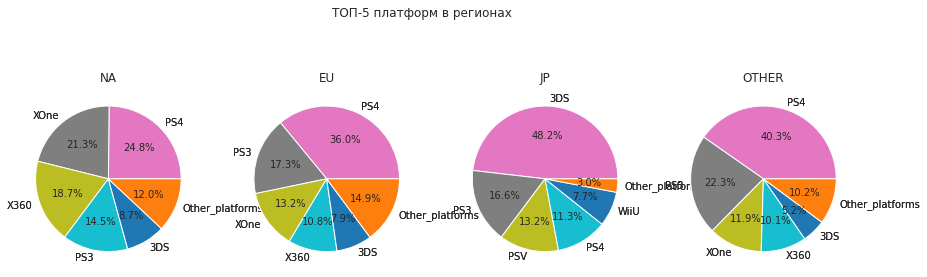

In [ ]:
# список регионов
countries = actual_period.columns[4:8]
# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(4):
  # 5 самых продающих платформ
  df_i = (actual_period.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: actual_period[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

**В Северной Америке, Европе и других странах лидирует PS4, а в Японии 3DS. Менее всего из топ-5 платформ популярна в Северной Америке, Европе и лругих странах 3DS, а в Японии - WiiU.**

#### Самые популярные жанры (тор-5)

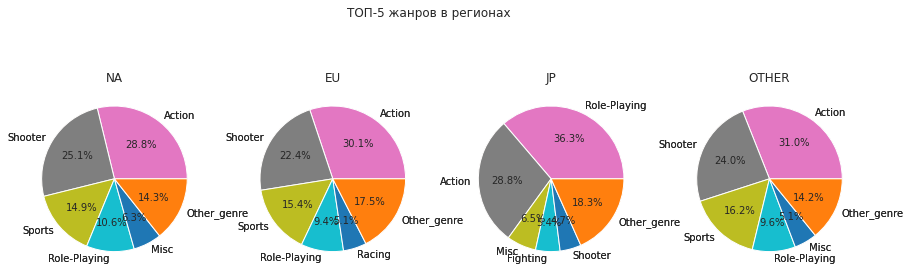

In [ ]:
# список жанров
genre = actual_period.columns[4:8]
# круговая диаграмма для каждого жанра
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(4):
  # 5 самых продающих жанров
  df_i = (actual_period.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_genre
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: actual_period[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'])
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

**В Северной Америке, Европе и других странах более популярен Action, а в Японии - Role-Playing. Менее всего из топ-5 жанров популярны в Северной Америке и других странах Misc, в Европе - Racing, в Японии - Shooter.**

#### Влияет ли рейтинг ESRP на продажи в отдельном регионе

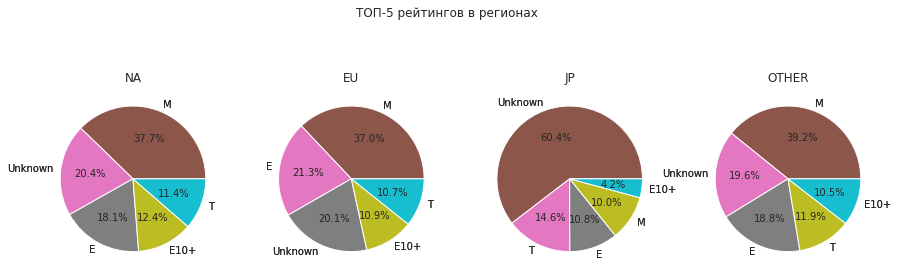

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('ТОП-5 рейтингов в регионах')
for i in range(4):
  # влияние рейтинга
  df_i = (actual_period.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'])
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

**В Северной Америке, Европе и других странах наиболее популярны игры с рейтингом M, в Японии самые популярные игры без рейтинга. Менее популярны в Северной Америке и Европе игры с рейтингом T, в Японии и других странах - E10+.**

**Промежуточный вывод 4:**

Портрет пользователя из северной Америки - играет на PS4 в Action с рейтингом M

Портрет пользователя из Европы - играет на PS4 в Action с рейтингом M

Портрет пользователя из Японии - играет на 3DS в Role-Playing без рейтинга.

Портрет пользователя из других стран - играет на PS4 в Action с рейтингом M

Из портрета среднестатистического пользователя выбивается Япония со своими культурными, историческими и технологическими факторами. Поэтому и Американская оценка здесь не действует.

### Проверка гипотез
<a id="5"></a>

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [ ]:
xbox = actual_period[actual_period['platform'] == 'XOne']['user_score'].dropna()
pc  = actual_period[actual_period['platform'] == 'PC']['user_score'].dropna()
#часть нового кода 1
print('Средний пользовательский рейтинг платформы XOne', round(xbox.mean(),2))
print('Средний пользовательский рейтинг платформы PC', round(pc.mean(),2))
print()
#конец части нового кода 1
alpha = 0.05

stat_lev, p_lev = st.levene(xbox, pc, center='mean')
print(f'Levene p-value: {p_lev:.4f}')

equal_var = p_lev > alpha
test_name = "Student-t (equal variances)" if equal_var else "Welch-t (unequal variances)"
stat, p = st.ttest_ind(xbox, pc, equal_var=equal_var)
print(f'{test_name}  p-value: {p:.4f}  (α = {alpha})')

if p < alpha:
    print('Отвергаем H₀: средние различаются.')
else:
    print('Нет оснований отвергать H₀: статистически значимых различий не найдено.')

Средний пользовательский рейтинг платформы XOne 6.52
Средний пользовательский рейтинг платформы PC 6.27

Levene p-value: 0.0006
Welch-t (unequal variances)  p-value: 0.1476  (α = 0.05)
Нет оснований отвергать H₀: статистически значимых различий не найдено.


#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

In [ ]:
action  = actual_period[actual_period['genre'] == 'Action']['user_score'].dropna()
sports  = actual_period[actual_period['genre'] == 'Sports']['user_score'].dropna()
#часть нового кода 1
print('Средний пользовательский рейтинг жанра Action', round(action.mean(),2))
print('Средний пользовательский рейтинг жанра Sports', round(sports.mean(),2))
print()
#конец части нового кода 1
alpha = 0.05

stat_lev, p_lev = st.levene(action, sports, center='mean')
print(f'Levene p-value: {p_lev:.4f}')

equal_var = p_lev > alpha
test_name = "Student-t (equal var)" if equal_var else "Welch-t (unequal var)"

stat, p = st.ttest_ind(action, sports, equal_var=equal_var)
print(f'{test_name}  p-value: {p:.4f}  (α = {alpha})')

if p < alpha:
    print("Отвергаем H₀: средние рейтинги Action и Sports различаются.")
else:
    print("Нет оснований отвергать H₀: статистически значимых различий не найдено.")

Средний пользовательский рейтинг жанра Action 6.84
Средний пользовательский рейтинг жанра Sports 5.24

Levene p-value: 0.0000
Welch-t (unequal var)  p-value: 0.0000  (α = 0.05)
Отвергаем H₀: средние рейтинги Action и Sports различаются.


**Промежуточный вывод 5:**

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтвердилась. Это означает, что пользователи ставят примерно одинаковые оценки играм на плаформах PC и Xbox One.

Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные - не подтвердилась. Средние этих выборок различаются. Это говорит о том, что пользователи ставят разные оценки играм с жанрами Action и Sports.

**Как вы сформулировали нулевую и альтернативную гипотезы:**
Принцип формулирования:
- H0 всегда описывает «ситуацию по умолчанию», когда эффекта нет (равенство средних, независимость, отсутствие различий).
- H1 отражает любое отклонение от Н0.
- Т.к. нам важен лишь факт отличия, а не его знак, берём двусторонний вариант. Т.е. мы не утверждаем заранее, что на какой-то из платформ оценки выше, поэтому выбираем двустороннюю альтернативу.

**Какой критерий применили для проверки гипотез и почему:**
Для обеих проверок ― две независимые выборки, сравниваем средние значения ― мы применили t-критерий Стюдента:
- если дисперсии оказались статистически одинаковой (p-value теста Левена > а) ― используем «классический» вариант Student-t
- если дисперсии различаются (p-value Левена <= а) ― берём более устойчивую версию Уэлча.

### Общий вывод
<a id="6"></a>

Цель исследования достигнута.

Для достижения поставленной цели решены следующие задачи:

1. Загрузили данные.

Данные состоят из 16715 строк и 11 столбцов:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Явных дубликатов в данных нет, обнаружены и обработаны неявные дубликаты по имени, платформе и году релиза. В данных присутствует большое количество пропусков:
- Name 2 - 0,01%
- Genre 2 - 0,01%
- Year_of_Release 269 - 1,61%
- User_Score 6701 - 40,09%
- Rating 6766 - 40,48%
- Critic_Score 8578 - 51,32%

2. Подготовили данные для анализа.

- наименования столбцов были приведены в соответствии с хорошим стилем к нижнему регистру
- преобразованы типы данных в соответствии с содержимым в столбцах year_of_release - Int64, user_score - float64
- удалены пропуски в столбцах name, genre и частично в year_of_release
- частично восстановлены данные в столбце year_of_release за счет указанного года в наименовании игры
- не удалены пропуски в столбцах critic_score, user_score и rating
- в столбце rating пропущенные значения заменены на 'Unknown'
- добавлен столбец total_sales с суммарными продажами во всех регионах.

Количество строк сократилось до 16462. Пропуски остались в столбцах critic_score (51,42%), user_score (54,60%) и rating (заполнены значением 'Unknown').

3. Проведен исследовательский анализ данных.

С 1980 до 1990 - ценность данных в основном историческая: они показывают зарождение рынка и могут пригодиться для долгосрочной ретроспективы.

С 1990 по 1996 - начинается массовое производство для PC и консолей 4-го поколения.

С 1997 по 2004 - переход на CD/DVD, появление PlayStation 2, Xbox, Steam — индустрия становится мейнстримом.

С 2005 по 2009 (пик) - HD-консоли (PS3/X360), дешёвая цифровая дистрибуция; широкий спектр жанров.

С 2010 по 2016 - рынок насыщается, AAA-бюджеты растут, мобильные и F2P-проекты уходят в другие витрины, которые здесь скорее всего отражены. Кроме того становится важным качество и реалистичность. На реализацию таких проектов уходит значительное количество средств и сил.

Поскольку:
- средний жизненный цикл одной платформы - 10 лет,
- пик развития платформы приходится на середину "жизни",
- учитывая выпуск игр по годам, а именно небольшое повышение количества выпущенных игр начиная с 2013 года включительно (2016 год снижение, но по условиям проекта - данные за 2016 год могут быть не полными).

актуальный период для прогнозирования на 2017 год определен - с 2013 года включительно.

PS4, PS3, XOne, 3DS, X360 являются лидерами продаж за актуальный период.

Медианные продажи для большинства платформ весьма скромны и составляют менее 0,5 млн копий. Это говорит о том, что большинство игр продаются в небольших объемах, в то время как лишь немногие становятся бестселлерами.
Платформы, такие как X360, Wii, PS4, XOne и WiiU имеют более высокие медианные продажи по сравнению с другими. Это говорит о большей популярности их игр в среднем.
У большинства платформ есть выбросы, что, вероятно, указывает на наличие игр-бестселлеров, которые продаются гораздо лучше, чем большинство других игр на платформе.

В целом корреляция слабая и местами отсутствует совсем.
- самая сильная корреляция отзывов пользователей и продаж у платформы 3DS. У других платформ "пользовательская" корреляция очень слабая.
- самая сильная корреляция отзывов критиков и продаж у платформы XOne, PS4 и 3DS.
- в целом корреляция отзывов критиков сильнее, чем корреляция отзывов пользователей. В целом, такие зависимости могут объясняться тем, что оценки критиков обычно доступны до релиза игры и могут повлиять на решение о покупке, в то время как оценки пользователей часто основываются на реальном опыте игры и могут быть более разнообразными и субъективными.

По продажам лидирует жанр Action, Shoter, Sports и Role-Playing. Action значительно выделяются по продажам, достигая более 300 миллионов копий. Меньше всего зарабатывают игры жанра puzzle и strategy.

Однако если учитывать медиану продаж Shoter превосходит остальные жанры. Данный жанр можно считать привлекательным для продаж. Большинство жанров усредненные и имеют схожие медианы. Из них можно выделить платформеры и спортивные игры, они тоже имеют неплохие показатели.

4. Составлен портрет пользователя каждого региона.

Портрет пользователя из северной Америки - играет на PS4 в Action с рейтингом M

Портрет пользователя из Европы - играет на PS4 в Action с рейтингом M

Портрет пользователя из Японии - играет на 3DS в Role-Playing без рейтинга.

Портрет пользователя из других стран - играет на PS4 в Action с рейтингом M

Из портрета среднестатистического пользователя выбивается Япония со своими культурными, историческими и технологическими факторами. Поэтому и Американская оценка здесь не действует.

5. Проверены гипотезы.

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтвердилась. Это означает, что пользователи ставят примерно одинаковые оценки играм на плаформах PC и Xbox One.

Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные - не подтвердилась. Средние этих выборок различаются. Это говорит о том, что пользователи ставят разные оценки играм с жанрами Action и Sports.

6. Написан общий вывод.

Рекоммендации для кампании на 2017 год.
- отдать предпочтение PS4, XOne, PS4, для Японии - 3DS. Не стоит забывать про PC как стабильно развивающиуюся платорму.
- отдать предпочтение Shooter, для Японии - Role-Playing.
- учитывать рейтинг критиков, которые публикуются в основном до выхода игры
- учитывать возрастную категорию М